In [1]:
!pip install pandas
!pip install numpy

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [6]:
print(movies)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

In [7]:
print(movies.head())
print(ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [8]:
# Merge datasets
df = ratings.merge(movies, on='movieId')

In [9]:
df.head(100)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
95,1,1445,3.0,964984112,McHale's Navy (1997),Comedy|War
96,1,1473,4.0,964980875,Best Men (1997),Action|Comedy|Crime|Drama
97,1,1500,4.0,964980985,Grosse Pointe Blank (1997),Comedy|Crime|Romance
98,1,1517,5.0,964981107,Austin Powers: International Man of Mystery (1...,Action|Adventure|Comedy


In [10]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [ ]:
df.describe()

In [13]:
# Number of unique users and movies
print("Total Users :", df['userId'].nunique())
print("Total Movies:", df['movieId'].nunique())

Total Users : 610
Total Movies: 9724


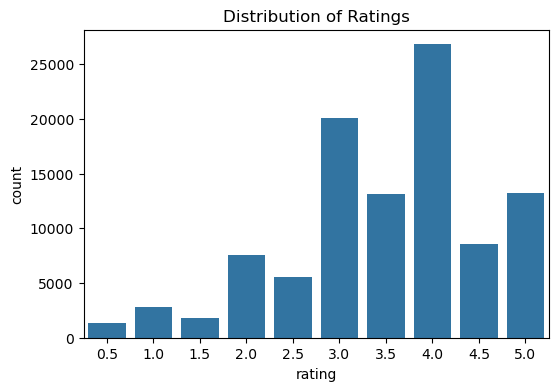

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df)
plt.title("Distribution of Ratings")
plt.show()

In [15]:
top_movies = df['title'].value_counts().head(10)
print(top_movies)


title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64


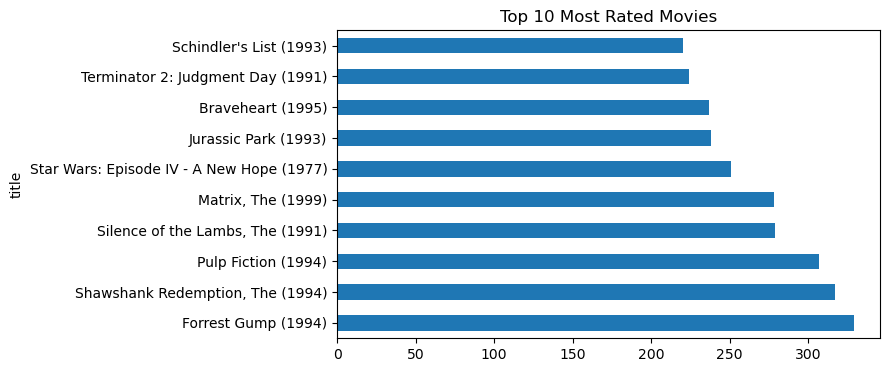

In [16]:
top_movies.plot(kind='barh', figsize=(7,4), title="Top 10 Most Rated Movies")
plt.show()

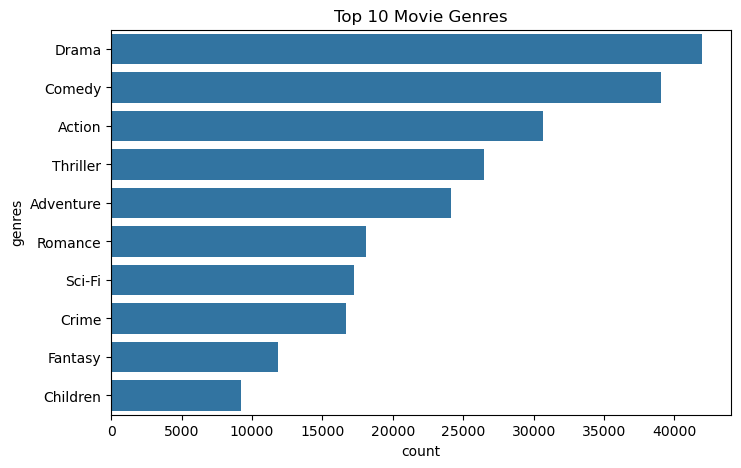

In [17]:
df['genres'] = df['genres'].str.split('|')
df_exploded = df.explode('genres').reset_index(drop=True)

plt.figure(figsize=(8,5))
sns.countplot(y='genres', data=df_exploded, order=df_exploded['genres'].value_counts().index[:10])
plt.title("Top 10 Movie Genres")
plt.show()

In [18]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [33]:
df['genres']=df['genres'].fillna('').astype(str)
df['combined_feature']=df['title']+" "+df['genres']
df['combined_feature'].head()

0    Toy Story (1995) ['Adventure', 'Animation', 'C...
1        Grumpier Old Men (1995) ['Comedy', 'Romance']
2          Heat (1995) ['Action', 'Crime', 'Thriller']
3    Seven (a.k.a. Se7en) (1995) ['Mystery', 'Thril...
4    Usual Suspects, The (1995) ['Crime', 'Mystery'...
Name: combined_feature, dtype: object

In [32]:
movies=df.copy()

In [22]:
movies=movies.drop_duplicates(subset='title',keep='first').reset_index(drop=True)

In [23]:
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(movies['genres'])

In [25]:
indices=pd.Series(movies.index,index=movies['title']).drop_duplicates()

In [38]:
def get_recommendations(title):
    if title not in indices:
        return "Movie not found in dataset!"

    idx = indices[title]
    sim_scores = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()
    sim_scores_indices = sim_scores.argsort()[::-1]
    sim_scores_indices = sim_scores_indices[sim_scores_indices != idx]
    top_indices = sim_scores_indices[:10]

    return movies['title'].iloc[top_indices]


In [40]:
get_recommendations('Heat (1995)')

7874                             Quantum of Solace (2008)
7633    Adventures of Buckaroo Banzai Across the 8th D...
7655                            Honeymoon in Vegas (1992)
9716                                   Toy Story 2 (1999)
8448                              Fisher King, The (1991)
4936                                       Othello (1995)
3036                                      Madeline (1998)
8201    Raiders of the Lost Ark (Indiana Jones and the...
1693                                      Die Hard (1988)
1315                                   He Got Game (1998)
Name: title, dtype: object